# Logistic Regression (로지스틱 회귀분석) 분류 기법

## 1. 로지스틱 회귀분석의 이해

### 1) 사전 지식
  - logistic function (= sigmoid function)
  - $g(z) = \dfrac{1}{1 + e^{-z}}$

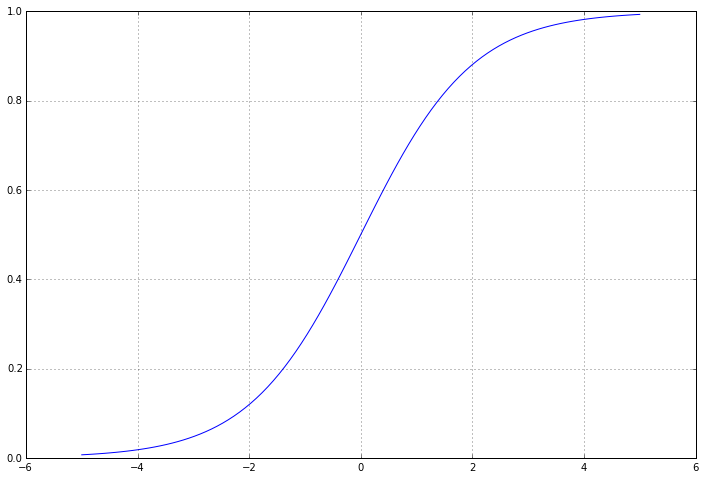

In [1]:
import math 
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

def logistic(z):
    return 1.0 / (1.0 + np.power(math.e, -1.0 * z))

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax1.grid(True)
xx = np.linspace(-5, 5, 100)
ax1.plot(xx,  logistic(xx))

  - 즉, logistic 함수에 입력으로 들어가는 $z$ 변수에 대해 다음과 같은 성질이 있다.
    - $g(z) >= 0.5$ if $z >= 0$ ($z$가 양수)
    - $g(z) < 0.5$ if $z < 0$ ($z$가 음수)  

### 2) 로지스틱 회귀분석을 이해하기 위한 예제 제시

- 예제 (Age and coronary heart disease (CHD))
![CHD Data](./figures/chd.png)

In [2]:
age = np.array([22, 23, 24, 27, 28, 30, 30, 32, 33, 35, 38, 40, 41, 46, 47, 48, 49,\
                49, 50, 51, 51, 52, 54, 55, 58, 60, 60, 62, 65, 67, 71, 77, 81])
chd = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])
df = pd.DataFrame({'age': age, 'chd': chd})
df

,age,chd
0,22,0
1,23,0
2,24,0
3,27,0
4,28,0
5,30,0
6,30,0
7,32,0
8,33,0
9,35,1


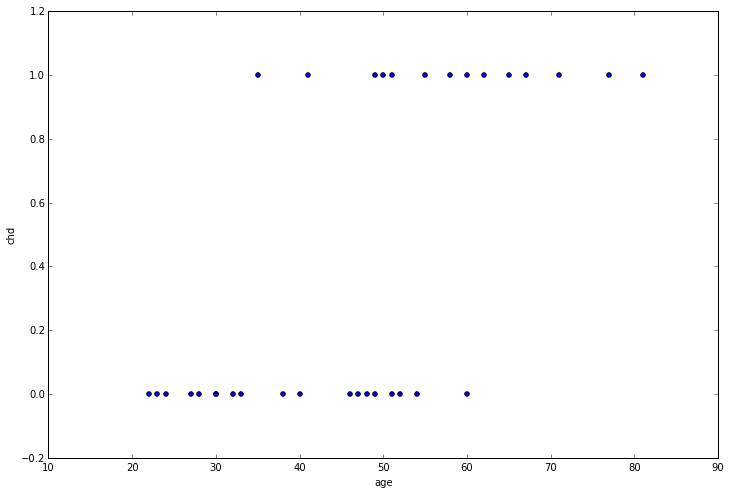

In [3]:
df.plot(kind='scatter', x='age', y='chd', figsize=(12, 8));

- 위 그림에서...
 - chd = 1은 심장병이 있다는 것이고 앞으로 y = 1 (양성 반응) 이라고 표기한다.
 - chd = 0은 심장병이 없다는 것이고 앞으로 y = 0 (음성 반응) 이라고 표기한다.

- 로지스틱 회귀 분석을 이해하기 위하여, 우선 위 데이터에 대하여 단순하게 ***회귀 분석 (Linear Regression)***을 수행하여 산출한 h 함수 (hyperthesis)를 plotting 

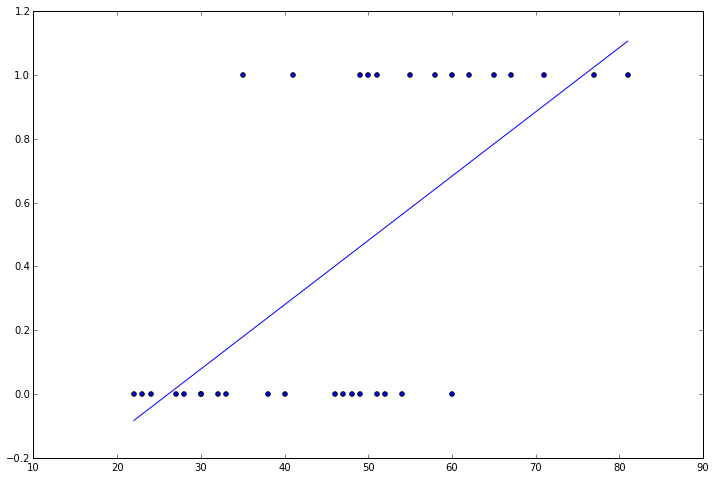

In [4]:
slope, intercept, r_value, p_value, std_err = stats.linregress(age, chd)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(age, chd)
xx = np.linspace(age.min(), age.max(), 2)
ax1.plot(xx, intercept + slope * xx)

- 복습: 회귀 분석 (Linear Regression) 모형
  - $n$개의 속성($n$개의 예측 변수)을 지닌 훈련 데이터 $n$-벡터 $X_i=\{x_{i1}, x_{i2}, ..., x_{in}\}$가 총 $m$ (즉, $1 \le i \le m$)개 주어지고,
  - 각 $X_i$ 벡터마다 연관된 실수 값 $y_i$ (결과 변수)이 주어질 때,
  - 임의의 $n$-벡터 $X =\{x_1, x_2,...,x_n\}$에 대해
  $$ $$ $$h_{\theta}(X) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$ $$$$
  - 위 식에서 $\theta=\{\theta_0, \theta_1, \theta_2, ..., \theta_n\}$는 계수 벡터(Coefficient Vector)라고 부른다. 
  - 위 모형을 좀 더 간단히 표현하면 아래와 같다.
    - 항상 $x_0 = 1$일 때, 임의의 $(n+1)$-벡터 $X =\{x_0, x_1, x_2,...,x_n\}$에 대해
    - $h_\theta(X) = \theta^T \cdot X$

### 3) 로지스틱 회귀 분석

- 로지스틱 회귀 분석 (Logistic Regression) 모형
  - ***logistic 함수와 기존 회귀 분석 모형을 합성한 함수 형태***
  - $n$개의 속성($n$개의 예측 변수)을 지닌 훈련 데이터 및 $x_{i0}=1$를 지닌 $(n+1)$-벡터 $X_i=\{x_{i0}, x_{i1}, x_{i2}, ..., x_{in}\}$가 총 $m$ (즉, $1 \le i \le m$)개 주어지고,
  - 각 $X_i$ 벡터마다 연관된 분류 표기 값 $y_i$ ($y_i \in \{0, 1\}$)이 주어질 때,
  - 임의의 $(n+1)$-벡터 $X =\{1, x_1, x_2,...,x_n\}$에 대해
$$ $$ $$h_\theta^L(X) = g(h_\theta(X))= \dfrac{1}{1 + e ^ {-h_\theta(X)}} = \dfrac{1}{1 + e ^ {-\theta^T \cdot X}}$$ $$$$
  - 위 식에서 $\theta=\{\theta_0, \theta_1, \theta_2, ..., \theta_n\}$

- ***로지스틱 회귀 분석 모형($h_\theta^L(X)$)의 해석***
  - 계수 백터  $\theta$를 구했다고 가정할 때, 임의의 입력 $X$에 대해 $y=1$ (분류 결과가 1)이 되는 추정 확률
  - 즉, $h_\theta^L(X) = P(y = 1 | X; \theta)$
  - $h_\theta^L(X) = 0.75$의 의미
    - 심장병 (chd)이 존재할 확률이 0.75이다.

- ***로지스틱 회귀 분석 모형($h_\theta^L(X)$)을 활용한 분류 결정 (Classification Decision)***
  - $h_\theta^L(X) = g(h_\theta(X)) >= 0.5$ if $h_\theta(X) =  \theta^T \cdot X >= 0$
    - 즉, $\theta^T \cdot X >= 0$이면 양성으로 분류하여 $y=1$로 분류한다.
  - $h_\theta^L(X) = g(h_\theta(X)) < 0.5$ if $h_\theta(X) =  \theta^T \cdot X < 0$
    - 즉, $\theta^T \cdot X < 0$이면 음성으로 분류하여 $y=0$로 분류한다.

- 로지스틱 회귀 분석에서 계수 벡터 $\theta$를 구하는 수학적 모델
  - 주어진 통계적 수치(훈련 데이터)들에 대해 다음 비용 함수 (Cost Function) $J^L(\theta)$를 구한다. 
  
  $$$$ $$J^L(\theta) = \dfrac{1}{m} \sum_{i = 1}^m \big| h_\theta^L(X_i) - y_i \big|^2 = \dfrac{1}{m} \sum_{i=1}^m \big| \dfrac{1}{1 + e^{-h_\theta(X_i)}} - y_i \big|^2$$
  
    - 위 식에서 
      - $y_i \in \{0, 1\}$
  - 비용 함수 $J^L(\theta)$를 최소로 만드는 $\theta$ 벡터가 로지스틱 회귀 분석에서 찾으려고 하는 것임
  
   $$$$ $$\newcommand{\argmin}{\arg\!\min}  \argmin_\theta J^L(\theta)$$ $$$$ 

- 비용 함수 $J^L(\theta)$를 최소로 만드는 $\theta$ 벡터를 구하는 방법
  - Gradient Descent
  - Stochastic Gradient Descent
  - [참고]: http://www.cs.rpi.edu/~magdon/courses/LFD-Slides/SlidesLect09.pdf

## 2. Univariate Logistic Regression (단일 변수 로지스틱 회귀분석)

- $m$개의 통계치 $x_i$ (즉, $1 \le i \le m$)와 이와 연관된 실수 값 $y_i$에 대하여
- 새로운 통계 수치 $x$와 연관된 실수 값 $y$를 예측하기 위해 다음과 같은 모형을 고려함
    $$$$ $$h_{\theta_0, \theta_1}(x) = \theta_0 + \theta_1 \cdot x$$ $$$$
    $$$$ $$h_{\theta_0, \theta_1}^L(x) = g(h_{\theta_0, \theta_1}(x))= \dfrac{1}{1 + e ^ {-h_{\theta_0, \theta_1}(x)}} = \dfrac{1}{1 + e ^ {-(\theta_0 + \theta_1 \cdot x)}}$$ $$$$

- 최적의 h 함수를 위한 $\theta_0$와 $\theta_1$을 구하기 위하여 다음 비용 함수 $J(\theta_0, \theta_1)$를 최소로 만드는 $\theta_0, \theta_1$ 벡터를 구한다.
    $$$$ $$J^L(\theta_0, \theta_1) = \dfrac{1}{m} \sum_{i = 1}^m \big| h_{\theta_0, \theta_1}^L(x_i) - y_i \big|^2 = \dfrac{1}{m} \sum_{i=1}^m \big| \dfrac{1}{1 + e^{-(\theta_0 + \theta_1 \cdot x)}} - y_i \big|^2$$ $$$$
  - 위 식에서 
    - $y_i \in \{0, 1\}$
    - $\theta_0$는 intercept, $\theta_1$은 coefficient 라고 부른다.

### - sklearn 모듈 활용

In [5]:
from sklearn import linear_model
regr = linear_model.LogisticRegression()

age_ = []
for i in age:
    age_.append((i,))
regr = regr.fit(age_, chd)

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [[ 0.03851967]]
Intercept: [-1.89317939]


In [6]:
def h_theta(x):
    return regr.intercept_[0] + regr.coef_[0][0] * x

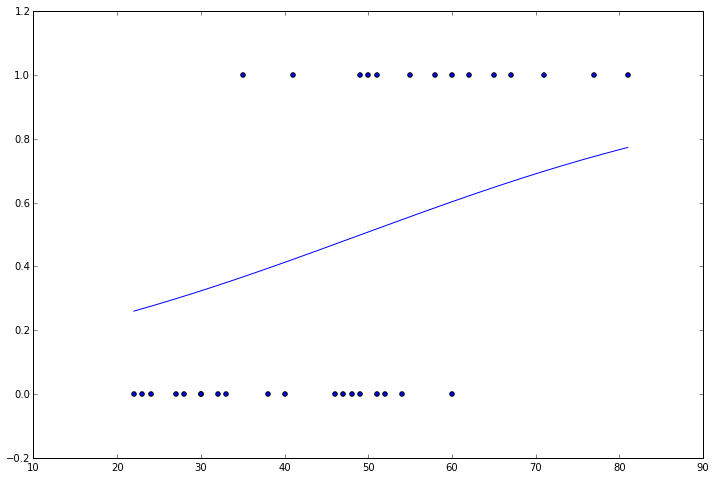

In [7]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(age, chd)
xx = np.linspace(age.min(), age.max(), 1000)
ax1.plot(xx, logistic(h_theta(xx)))

- $h_\theta^L(X) = P(y = 1 | x; \theta) = 0.5$인 데이터 x 찾기
  - 즉, $intercept + coef \times x = 0$인 데이터 x 찾기
  - $x = - \dfrac{intercept}{coef}$

In [8]:
print -1.0 * regr.intercept_[0] / regr.coef_[0][0]

49.1483851852


- $h_\theta^L(X) = P(y = 1 | x; \theta) = 0.5$을 직접 고려하여 x 찾기

In [9]:
xx = np.linspace(age.min(), age.max(), 1000)
for x in xx:
    if abs(logistic(h_theta(x)) - 0.5000) < 0.0003:
        print x

49.1671671672


- 즉, 나이가 49.1 세부터는 심장병이 존재할 확률이 0.5 이상이며 "심장병 존재 가능자"로 분류할 수 있다.

- 나이가 50세, 60세, 70세, 80세일 때 심장병이 존재할 확률은?

In [10]:
print logistic(h_theta(50))
print logistic(h_theta(60))
print logistic(h_theta(70))
print logistic(h_theta(80))

0.508200244269
0.603004707604
0.690657986785
0.766453692561


### - 로지스틱 분석 이해를 위한 데이터 변형

- 데이터를 조금 변경해보자.
  - 변경된 데이터에서는 40세 부터 100% 심장병이 존재한다.

In [11]:
age = np.array([22, 23, 24, 27, 28, 30, 30, 32, 33, 35, 38, 40, 41, 46, 47, 48, 49,\
                49, 50, 51, 51, 52, 54, 55, 58, 60, 60, 62, 65, 67, 71, 77, 81])
chd2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
df2 = pd.DataFrame({'age': age, 'chd': chd2})
regr2 = linear_model.LogisticRegression()

age_ = []
for i in age:
    age_.append((i,))
regr2 = regr2.fit(age_, chd2)

print 'Coefficients:', regr2.coef_
print 'Intercept:', regr2.intercept_

Coefficients: [[ 0.07131931]]
Intercept: [-2.25741509]


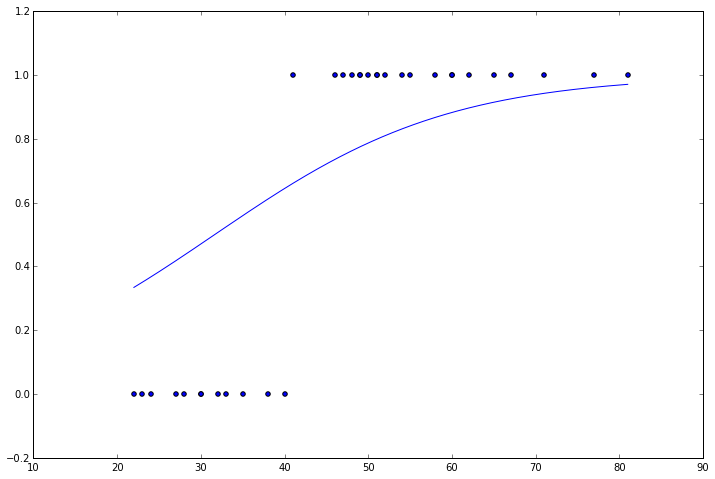

In [12]:
def h_theta(x):
    return regr2.intercept_[0] + regr2.coef_[0][0] * x

fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111)
ax2.scatter(age, chd2)
xx2 = np.linspace(age.min(), age.max(), 1000)
ax2.plot(xx2, logistic(h_theta(xx2)))

In [13]:
print -1.0 * regr2.intercept_[0] / regr2.coef_[0][0]
xx2 = np.linspace(age.min(), age.max(), 1000)
for x in xx2:
    if abs(logistic(h_theta(x)) - 0.5000) < 0.0005:
        print x

31.6522293282
31.6266266266


- 나이가 31.6 세부터는 심장병이 존재할 확률이 0.5 이상이며 "심장병 존재 가능자"로 분류할 수 있다.

- 나이가 50세, 60세, 70세, 80세일 때 심장병이 존재할 확률은?

In [14]:
print logistic(h_theta(50))
print logistic(h_theta(60))
print logistic(h_theta(70))
print logistic(h_theta(80))

0.787270468923
0.883061158965
0.939056959384
0.969175310841


## 3.  Multivariate Logistic Regression (다변수 로지스틱 회귀분석)

### 1) Mushroom Data Set 로드 및 scikit을 활용하기 위한 데이터 가공¶

- Data Set 로드
  - 21개의 Features (예측 변수)
  - 2개의 분류 (타겟 변수, outcomes)

In [28]:
import urllib2
path = 'http://ftp.ics.uci.edu/pub/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib2.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)

- 수치형 데이터로 변경

In [29]:
map_dic = {}
num_columns = df.shape[1]
for i in range(num_columns):
    unique_array = df[i].unique()
    map_dic_sub = {}
    for j in range(len(unique_array)):
        map_dic_sub[unique_array[j]] = j
    df[i] = df[i].map(map_dic_sub)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,1,2
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,0,2
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,3,1
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,2


- 예측 변수와 타겟 변수의 분리

In [30]:
attributes = df.iloc[:, 1:22]
mushroom_data = attributes.values
mushroom_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [1, 0, 2, ..., 0, 1, 1],
       ..., 
       [3, 0, 0, ..., 0, 8, 5],
       [4, 1, 0, ..., 1, 4, 3],
       [0, 0, 0, ..., 0, 6, 5]])

In [31]:
target_series = df.iloc[:, 0]
mushroom_target = target_series.values
mushroom_target

array([0, 1, 1, ..., 1, 0, 1])

### 2) scikit을 활용한 로지스틱 회귀분석¶

In [32]:
regr3 = linear_model.LogisticRegression()
regr3.fit(mushroom_data, mushroom_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [33]:
print 'Coefficients:', regr3.coef_
print 'Intercept:', regr3.intercept_

Coefficients: [[  5.87843016e-02   1.13575037e+00  -9.91573459e-03   9.17309013e+00
   -3.33157491e+00   3.62560753e-01   3.65032939e+00   1.05269840e+01
   -3.43440879e-01   2.00068508e+00   2.11067677e+00  -2.32688199e+00
   -2.49868417e+00  -6.97812077e-01   7.75703628e-01   0.00000000e+00
    4.89226940e-01   3.12869161e+00   2.29791604e-01  -1.56743618e+00
    7.31096068e-01]]
Intercept: [-2.36715778]


In [34]:
mushroom_data[-1]

array([ 0,  0,  0,  1,  3,  1,  0,  1, 10,  0,  4,  0,  0,  6,  7,  0,  2,
        0,  0,  6,  5])

In [35]:
print mushroom_data[-1], ":", mushroom_target[-1]
print regr3.predict(mushroom_data[-1])

[ 0  0  0  1  3  1  0  1 10  0  4  0  0  6  7  0  2  0  0  6  5] : 1
[1]


In [36]:
print mushroom_data[-2], ":", mushroom_target[-2]
print regr3.predict(mushroom_data[-2])

[4 1 0 1 6 0 0 0 8 1 4 0 3 0 0 0 0 0 1 4 3] : 0
[0]


In [37]:
predicted = []
for i in range(0, len(mushroom_data)):
    predicted.append(regr3.predict(mushroom_data[i]))

df.loc[:, 'predicted'] = predicted
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,predicted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,1,1,2,1
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,1,1,2,1,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,0,0,0,0,1,2,1
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,0,0,0,1,0,2,1
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,3,1,0
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,2,1


- 로지스틱 회귀분석에 의한 분류 정확도

In [38]:
correctly_predicted = 0
for i in range(0, len(mushroom_data)):
    if predicted[i] == mushroom_target[i]:
        correctly_predicted += 1
        
print float(correctly_predicted) / len(mushroom_data)

0.985352043328


### 3) 두 개의 속성 (6번, 9번)에 대해서만 Logistic Regression 수행후 Visualization

In [39]:
selected_attrs = df[[4, 5]]
selected_mushroom_data = selected_attrs.values
selected_mushroom_data

array([[0, 0],
       [0, 1],
       [0, 2],
       ..., 
       [1, 3],
       [1, 6],
       [1, 3]])

In [40]:
regr4 = linear_model.LogisticRegression()
regr4.fit(selected_mushroom_data, mushroom_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [41]:
print 'Coefficients:', regr4.coef_
print 'Intercept:', regr4.intercept_

Coefficients: [[-0.84829824 -1.38533641]]
Intercept: [ 5.42984477]


In [42]:
h = 0.5

x_min, x_max = selected_mushroom_data[:, 0].min(), selected_mushroom_data[:, 0].max()
y_min, y_max = selected_mushroom_data[:, 1].min(), selected_mushroom_data[:, 1].max()
print x_min, x_max
print y_min, y_max
print

x_array = np.arange(x_min - 1, x_max + 1, h)
y_array = np.arange(y_min - 1, y_max + 1, h)
print x_array.shape
print y_array.shape
print x_array
print y_array
print

0 1
0 8

(6,)
(20,)
[-1.  -0.5  0.   0.5  1.   1.5]
[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5  8.   8.5]



In [43]:
xx, yy = np.meshgrid(x_array, y_array)
print xx.shape
print yy.shape
print xx
print yy
print

xx_flat = xx.ravel()
yy_flat = yy.ravel()
print xx_flat.shape
print yy_flat.shape
print xx_flat
print yy_flat
print

(20, 6)
(20, 6)
[[-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]
 [-1.  -0.5  0.   0.5  1.   1.5]]
[[-1.  -1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1.   1. ]
 [ 1.5  1.5  1.5  1.5  1.5  1.5]
 [ 2.   2.   2.   2.   2.   2. ]
 [ 2.5  2.5  2.5  2.5  2.5  2.5]
 [ 3.   3.   3.   3.   3.   3. ]
 [ 3.5  3.5  3.5  3.5  3.5

In [44]:
data = np.c_[xx.ravel(), yy.ravel()]
print data[:5]

[[-1.  -1. ]
 [-0.5 -1. ]
 [ 0.  -1. ]
 [ 0.5 -1. ]
 [ 1.  -1. ]]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


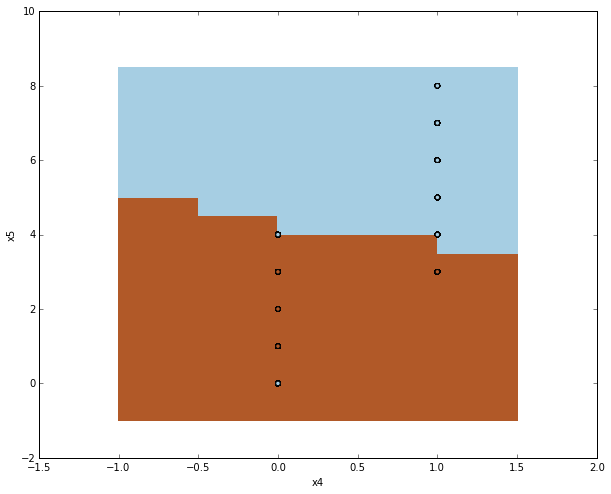

In [45]:
Z = regr4.predict(data)
print Z
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
ax.scatter(selected_mushroom_data[:, 0], selected_mushroom_data[:, 1], c=mushroom_target, cmap=plt.cm.Paired)
plt.xlabel('x4')
plt.ylabel('x5')

In [46]:
print selected_mushroom_data[-1], ":", mushroom_target[-1]
print regr4.predict(selected_mushroom_data[-1])

[1 3] : 1
[1]


In [47]:
print selected_mushroom_data[-2], ":", mushroom_target[-2]
print regr4.predict(selected_mushroom_data[-2])

[1 6] : 0
[0]


### 2) Iris Data Set 로드 및 scikit 활용 (Multiclass Classification)
- [reference] Stanford's machine learning course presented by Professor Andrew Ng
- 4개의 Features (예측 변수)
- ***3개의 분류 (타겟 변수, outcomes)***

![Multiclass](./figures/multi-class-logistic-regression.png)

- 훈련 데이터를 다음과 같이 3개의 Binary Logistic Regression 분류 문제로 변경한다. 
  - Triangle (1) vs crosses and squares (0) 
    - $h_\theta^{L1}(X) = P(y=1 | X; \theta)$
  - Crosses (1) vs triangle and square (0) 
    - $h_\theta^{L2}(X) = P(y=1 | X; \theta)$
  - Square (1) vs crosses and square (0) 
    - $h_\theta^{L2}(X) = P(y=1 | X; \theta)$    
    
<!-- -->    
- 분류하려는 타킷 변수가 $k$개 이면 총 $k$개의 Binary Logistic Regression 분류 문제로 변경하여 해결한다.

![Multiclass](./figures/multi-class-logistic-regression2.png)

In [48]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [49]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

- 아래와 같이 분류 종류가 3가지이다.

In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [51]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
print len(iris.data), len(iris.target)

150 150


In [53]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [54]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [55]:
iris.data[50:55]

array([[ 7. ,  3.2,  4.7,  1.4],
       [ 6.4,  3.2,  4.5,  1.5],
       [ 6.9,  3.1,  4.9,  1.5],
       [ 5.5,  2.3,  4. ,  1.3],
       [ 6.5,  2.8,  4.6,  1.5]])

In [56]:
iris.target[50:55]

array([1, 1, 1, 1, 1])

In [57]:
regr5 = linear_model.LogisticRegression()
regr5.fit(iris.data[:, :2], iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [58]:
print 'Coefficients:', regr5.coef_
print 'Intercept:', regr5.intercept_

Coefficients: [[-2.49579289  4.01011301]
 [ 0.49709451 -1.63380222]
 [ 1.15921404 -1.77736568]]
Intercept: [ 0.81713932  1.22543562 -2.22516119]


- 두 개의 속성에 대해서만 Logistic Regression 수행
  - http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

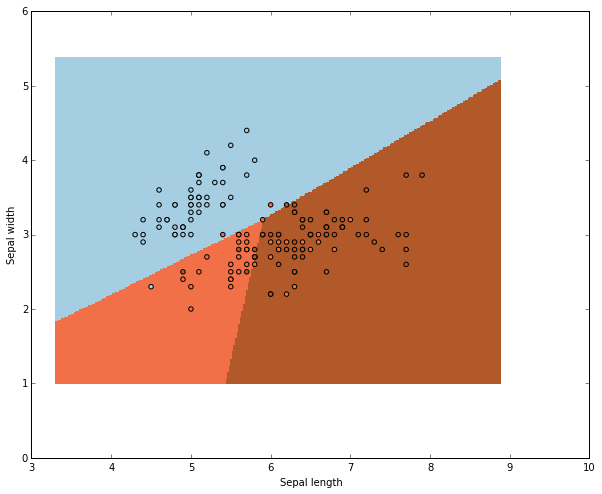

In [59]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

regr6 = linear_model.LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
regr6.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x_array = np.arange(x_min - .5, x_max + .5, h)
y_array = np.arange(y_min - .5, y_max + .5, h)
xx, yy = np.meshgrid(x_array, y_array)
Z = regr6.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')